In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [3]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [4]:
from torchvision import transforms

#my_tranforms = transforms.Compose ([transforms.ToTensor()])
my_tranforms = transforms.Compose ([ transforms.ToPILImage(), transforms.ToTensor()])

#my_tranforms = transforms.Compose ([ transforms.ToPILImage()])

#my_tranforms = transforms.Compose ([transforms.ToTensor(),transforms.Normalize((0.5, ), (0.5, ))])


In [5]:
import torch
from torch.utils.data import Dataset



class kan_dataset(Dataset):
    def __init__(self, csv_file, test_data=0, transform=my_tranforms):
        df = pd.read_csv(csv_file)
        self.test_data = test_data
        if self.test_data ==0:
            self.y = df['label']
            self.y = self.y.to_numpy()
        else:
            self.y = None
        
        self.x = df.iloc[:,1:]
        
        self.x = self.x.to_numpy().astype(np.uint8)
        
        #self.x = self.x.to_numpy().astype(float)
        #self.x = self.x.to_numpy()
        #self.x = self.x.reshape(self.x.shape[0],1,28,28)
        
        #numpy images have color channels last 
        self.x = self.x.reshape(self.x.shape[0],28,28,1)
        
        self.transform = transform
        
        #print ('self.x',self.x)
        
    def __len__(self):
        return (len(self.x))
    
    def __getitem__(self, idx):
        data = self.x[idx]
        transformed_data = self.transform (data)
        if self.test_data ==0:
            label = self.y[idx]
            return transformed_data, label
        else:
            return transformed_data
        


In [6]:
kan_train_data = kan_dataset('/kaggle/input/Kannada-MNIST/train.csv',transform=my_tranforms)

In [7]:
from torch.utils.data import DataLoader

batch_size =100
train_data_loader = DataLoader(kan_train_data,batch_size=batch_size,shuffle=True)

In [8]:
for i,(data,labels) in enumerate(train_data_loader):
    print ('data shape',data.size())
    img1 = data[0].to(device)
    print ('img1 shape',img1.size())
    print ('img1 ',img1)
    break
    
    #For this case using ([ transforms.ToPILImage(), transforms.ToTensor()]) results in same result as dividing numpy array by 255
    # values match with https://www.kaggle.com/venkatram123/kan-mnist-pytorch
    
# data shape torch.Size([5, 1, 28, 28])
# img1 shape torch.Size([1, 28, 28])
# img1  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.9176, 1.0000,
#           1.0000, 0.5843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.9176, 1.0000,
#           1.0000, 0.9059, 0.5804, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.1569, 0.6549, 0.9686, 1.0000,
#           1.0000, 1.0000, 0.7490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.1961, 0.6039, 1.0000, 1.0000, 0.6431,
#           0.5255, 0.7216, 0.8667, 0.4745, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.1882, 0.6039, 0.9176, 0.6745, 0.6745, 0.1686,
#           0.0000, 0.2824, 0.6745, 0.6745, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],

data shape torch.Size([100, 1, 28, 28])
img1 shape torch.Size([1, 28, 28])
img1  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
#without any transforms

#     def __init__(self, csv_file, test_data=0, transform=my_tranforms):
#         df = pd.read_csv(csv_file)
#         self.y = df['label']
        
#         self.x = df.iloc[:,1:]
        
#         self.x = self.x.to_numpy()
#         self.x = self.x.reshape(self.x.shape[0],1,28,28)
        
#     def __getitem__(self, idx):
#         data = self.x[idx]
#         label = self.y[idx]
        
        
#         return data, label
    
    
# for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     break
    
# data shape torch.Size([5, 1, 28, 28])

In [ ]:
# with 

# my_tranforms = transforms.Compose ([transforms.ToTensor()])

#     def __init__(self, csv_file, test_data=0, transform=my_tranforms):
#         df = pd.read_csv(csv_file)
#         self.y = df['label']
        
#         self.x = df.iloc[:,1:]
        
#         self.x = self.x.to_numpy()
#         self.x = self.x.reshape(self.x.shape[0],1,28,28)

#     def __getitem__(self, idx):
#         data = self.x[idx]
#         label = self.y[idx]
        
#         transformed_data = self.transform (data)
        
#         return transformed_data, label
    

# for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     break

# data shape torch.Size([5, 28, 1, 28])

# this is because ToTensor assumes that image is of Height,Width, Color_Channels and converts it to Color_Channels,Height,Width

In [ ]:
# with transform to pil 

#     def __init__(self, csv_file, test_data=0, transform=my_tranforms):
#         df = pd.read_csv(csv_file)
#         self.y = df['label']
        
#         self.x = df.iloc[:,1:]
        
#         self.x = self.x.to_numpy()
#         self.x = self.x.reshape(self.x.shape[0],1,28,28)

    
    
#     def __getitem__(self, idx):
#         data = self.x[idx]
#         label = self.y[idx]
        
#         transformed_data = self.transform (data)
        
#         return transformed_data, label
    
#     for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     break

#     ValueError: pic should not have > 4 channels. Got 28 channels.

In [ ]:
#with just to tensor and different reshape 

# my_tranforms = transforms.Compose ([transforms.ToTensor()])

#     def __init__(self, csv_file, test_data=0, transform=my_tranforms):
#         df = pd.read_csv(csv_file)
#         self.y = df['label']
        
#         self.x = df.iloc[:,1:]
        
#         self.x = self.x.to_numpy()
#         #self.x = self.x.reshape(self.x.shape[0],1,28,28)
#         self.x = self.x.reshape(self.x.shape[0],28,28,1)
        
#     def __getitem__(self, idx):
#         data = self.x[idx]
#         label = self.y[idx]
        
#         transformed_data = self.transform (data)
        
#         return transformed_data, label
    
#     for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     break

#     data shape torch.Size([5, 1, 28, 28])


In [ ]:
# with pil image transform

# my_tranforms = transforms.Compose ([ transforms.ToPILImage(), transforms.ToTensor()])

# TypeError: Input type int64 is not supported

In [ ]:
# to fix above convert to unit8

#     def __init__(self, csv_file, test_data=0, transform=my_tranforms):
#         df = pd.read_csv(csv_file)
#         self.y = df['label']
        
#         self.x = df.iloc[:,1:]
        
#         self.x = self.x.to_numpy().astype(np.uint8)
#         self.x = self.x.reshape(self.x.shape[0],28,28,1)
        
    
#     def __getitem__(self, idx):
#         data = self.x[idx]
#         label = self.y[idx]
        
#         transformed_data = self.transform (data)
        
#         return transformed_data, label
    
# for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     break
    
# data shape torch.Size([5, 1, 28, 28])

In [ ]:
# just to tensor does not do any normalize

# sample output 

# img1  tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#             0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,
#           234, 255, 255, 149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,
#           234, 255, 255, 231, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 167,
#           247, 255, 255, 255, 191,   0,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 154, 255,
#           255, 164, 134, 184, 221, 121,   0,   0,   0,   0,   0,   0,   0,   0],
#          [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 154, 234, 172,
#           172,  43,   0,  72, 172, 172,   0,   0,   0,   0,   0,   0,   0,   0],
               
               

In [ ]:
# use to_tensor and to_normalize,
# does not do correctly


# img1  tensor([[[ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  41., 467., 509., 509., 297.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  41., 467., 509., 509., 461., 295.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            -1.,  79., 333., 493., 509., 509., 509., 381.,  -1.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
#            99., 307., 509., 509., 327., 267., 367., 441., 241.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
#          [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  95.,
#           307., 467., 343., 343.,  85.,  -1., 143., 343., 343.,  -1.,  -1.,
#            -1.,  -1.,  -1.,  -1.,  -1.,  -1.],

In [ ]:
# pil transform alone

# my_tranforms = transforms.Compose ([ transforms.ToPILImage()])

# for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     img1 = data[0]
#     print ('img1 shape',img1.size())
#     print ('img1 ',img1)
#     break

# TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

        
        

In [ ]:
# using pil transform and to tensor is correct way to go

# my_tranforms = transforms.Compose ([ transforms.ToPILImage(), transforms.ToTensor()])


# class kan_dataset(Dataset):
#     def __init__(self, csv_file, test_data=0, transform=my_tranforms):
#         df = pd.read_csv(csv_file)
#         self.y = df['label']
        
#         self.x = df.iloc[:,1:]
        
#         self.x = self.x.to_numpy().astype(np.uint8)
        
#         #self.x = self.x.to_numpy().astype(float)
        
#         #self.x = self.x.to_numpy()

#         #self.x = self.x.reshape(self.x.shape[0],1,28,28)
#         self.x = self.x.reshape(self.x.shape[0],28,28,1)
        
#         self.transform = transform
        
#         #print ('self.x',self.x)
        
#     def __len__(self):
#         return (len(self.x))
    
#     def __getitem__(self, idx):
#         data = self.x[idx]
#         label = self.y[idx]
        
#         transformed_data = self.transform (data)
        
#         return transformed_data, label

# for i,(data,labels) in enumerate(train_data_loader):
#     print ('data shape',data.size())
#     img1 = data[0]
#     print ('img1 shape',img1.size())
#     print ('img1 ',img1)
#     break
    
    
# data shape torch.Size([5, 1, 28, 28])
# img1 shape torch.Size([1, 28, 28])
# img1  tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.9176, 1.0000,
#           1.0000, 0.5843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0824, 0.9176, 1.0000,
#           1.0000, 0.9059, 0.5804, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000, 0.1569, 0.6549, 0.9686, 1.0000,
#           1.0000, 1.0000, 0.7490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.1961, 0.6039, 1.0000, 1.0000, 0.6431,
#           0.5255, 0.7216, 0.8667, 0.4745, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],
#          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.1882, 0.6039, 0.9176, 0.6745, 0.6745, 0.1686,
#           0.0000, 0.2824, 0.6745, 0.6745, 0.0000, 0.0000, 0.0000, 0.0000,
#           0.0000, 0.0000, 0.0000, 0.0000],

img1 shape torch.Size([1, 28, 28])
transpose_image shape (28, 28, 1)


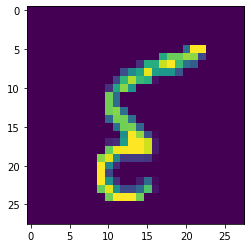

In [11]:
print ('img1 shape',img1.size())

%matplotlib inline
import matplotlib.pyplot as plt
numpy_image = img1.cpu().numpy()
transpose_image = numpy_image.transpose(1,2,0)
print ('transpose_image shape',transpose_image.shape)
plt.imshow(transpose_image)
plt.show()


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class kan_mnist_net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1= nn.Conv2d(1,32,5)
        self.bc1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2,2)
        
        self.conv2= nn.Conv2d(32,64,5)
        self.bc2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2)
        
        self.fc1 = nn.Linear(64 * 4*4, 1000)
        self.bc3 = nn.BatchNorm1d(1000)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1000, 500)
        self.bc4 = nn.BatchNorm1d(500)
        self.fc3 = nn.Linear(500, 10)
    
    def forward(self,x):
        conv1_x = F.relu(self.bc1(self.conv1(x)))
        
        pool1_x = self.pool1(conv1_x)
        
        conv2_x = F.relu(self.bc2(self.conv2(pool1_x)))
        
        pool2_x = self.pool2(conv2_x)
        
        #print ('pool2_x size', pool2_x.size())
        
        flatten_x = pool2_x.view(pool2_x.shape[0],-1)
        
        fc1_x = F.relu(self.bc3(self.fc1(flatten_x)))
        drop1_x = self.drop1 (fc1_x)
        fc2_x = F.relu(self.bc4(self.fc2(drop1_x)))
        fc3_x = self.fc3(fc2_x)
        
        return fc3_x

model = kan_mnist_net()
model.to(device)

kan_mnist_net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (bc1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (bc2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=1000, bias=True)
  (bc3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (bc4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)

In [13]:
dat_iterator = iter(train_data_loader)
sample_data = next(dat_iterator)

image = sample_data[0].to(device)
label = sample_data[1].to(device)
print ('image size',image.size())

print ('label size',label.size())
print ('actual label ',label)

image size torch.Size([100, 1, 28, 28])
label size torch.Size([100])
actual label  tensor([2, 0, 0, 6, 1, 1, 4, 4, 1, 4, 1, 0, 5, 8, 6, 2, 9, 4, 0, 3, 2, 2, 3, 6,
        9, 3, 0, 2, 3, 8, 0, 7, 2, 6, 4, 5, 4, 1, 8, 8, 9, 5, 8, 8, 2, 8, 2, 4,
        7, 7, 0, 1, 6, 0, 7, 4, 4, 5, 4, 0, 0, 9, 2, 0, 9, 6, 2, 9, 1, 5, 5, 6,
        7, 5, 7, 0, 3, 3, 2, 1, 5, 4, 6, 0, 4, 1, 5, 8, 6, 1, 7, 5, 4, 4, 5, 8,
        2, 7, 7, 0], device='cuda:0')


In [14]:
output = model(image)
print ('output size', output.size())
print ('output',output)
max_pred = output.argmax(axis=1)
print ('max_pred',max_pred)

output size torch.Size([100, 10])
output tensor([[-6.3146e-01,  4.8455e-01, -3.7723e-01,  4.2622e-01, -1.7321e-01,
          1.8385e-01,  3.4801e-02, -2.3213e-01, -7.2301e-01,  5.9246e-01],
        [ 2.2287e-01, -2.5007e-01,  2.5953e-02,  4.7398e-01,  2.4702e-01,
         -1.1351e-01, -8.2178e-02,  1.2561e-01, -1.5894e-01,  3.9258e-01],
        [-3.4546e-01,  2.8035e-01, -3.0741e-01,  4.1573e-01,  3.9974e-01,
         -2.8484e-01,  3.0221e-01,  1.0377e-01,  3.5045e-01, -1.6852e-01],
        [-5.2177e-01,  1.6949e-02,  3.8459e-01,  4.4130e-01, -2.0049e-01,
         -2.8251e-01, -1.9552e-01,  4.4703e-02, -3.4025e-01,  6.1267e-01],
        [ 6.6308e-01,  1.3916e-01,  7.4571e-01,  6.9279e-01,  1.1254e-01,
         -2.7957e-01, -2.4860e-01, -1.6780e-02,  1.8713e-01, -1.1293e-01],
        [-8.5286e-02, -1.6519e-01, -1.3409e-01,  4.1946e-01,  2.4170e-02,
         -2.8650e-01, -3.9305e-01,  9.6851e-02, -4.0996e-01, -1.2180e-01],
        [ 1.5091e-02,  3.6296e-01, -8.9666e-01,  5.4874e-01, -7.2

In [15]:
model.parameters

<bound method Module.parameters of kan_mnist_net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (bc1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (bc2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=1000, bias=True)
  (bc3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (bc4): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)>

In [18]:
import time
start = time.time()
print ('start',start)


model = kan_mnist_net()
model.to(device)

#criterion = nn.CrossEntropyLoss()
#below does not seem needed as since input is cuda, loss should be taken care already
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)
#using params=model.parameters() is very important
#below did not cause convergence
#optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

model.train()

epochs = 50

for e in range(epochs):
    
    running_loss = 0
    cnt = 0
    
    for i, data in enumerate(train_data_loader):
        cnt+=1 
        
        image =data[0].to(device)
        label = data[1].to(device)
          
        
        #image = image.type(torch.FloatTensor)
        
        output = model(image)
        
        optimizer.zero_grad()
        
        loss = criterion(output,label)
    
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
        if cnt%100 == 99:
            print (f"epoch {e} , i {i}, running_loss {running_loss}")
            running_loss = 0
            
end = time.time()
print ('end',end)
print('time taken',end - start)
print('time taken minutes',(end - start)/60)
        

start 1660754347.8819711
epoch 0 , i 98, running_loss 18.98615239560604
epoch 0 , i 198, running_loss 5.643915937282145
epoch 0 , i 298, running_loss 5.1435641860589385
epoch 0 , i 398, running_loss 4.160940175876021
epoch 0 , i 498, running_loss 4.437479008221999
epoch 0 , i 598, running_loss 3.8387009871657938
epoch 1 , i 98, running_loss 2.9066844552289695
epoch 1 , i 198, running_loss 2.835520467720926
epoch 1 , i 298, running_loss 2.3674852536059916
epoch 1 , i 398, running_loss 2.497236017487012
epoch 1 , i 498, running_loss 2.978710552677512
epoch 1 , i 598, running_loss 2.5936342724598944
epoch 2 , i 98, running_loss 1.4497908710618503
epoch 2 , i 198, running_loss 1.9485924853943288
epoch 2 , i 298, running_loss 1.9345113537856378
epoch 2 , i 398, running_loss 1.8602716306922957
epoch 2 , i 498, running_loss 2.3593342261156067
epoch 2 , i 598, running_loss 2.155788365926128
epoch 3 , i 98, running_loss 1.739651290787151
epoch 3 , i 198, running_loss 1.1582684142631479
epoch 3 

# Prediction on test dataset

In [21]:
kan_test_data = kan_dataset('/kaggle/input/Kannada-MNIST/test.csv',transform=my_tranforms,test_data=1)

In [22]:
from torch.utils.data import DataLoader
batch_size= 100
test_data_loader = DataLoader(kan_test_data,batch_size)

In [23]:
for i,data in enumerate(test_data_loader):
    print ('data shape',data.size())
    img1 = data[0].to(device)
    print ('img1 shape',img1.size())
    #print ('img1 ',img1)
    break

data shape torch.Size([100, 1, 28, 28])
img1 shape torch.Size([1, 28, 28])


In [35]:
model.eval()
predictions_tensor = torch.IntTensor().cuda()
#predictions_tensor.cuda()
print ('predictions_tensor',predictions_tensor)

with torch.no_grad():
    
    for i,data in enumerate(test_data_loader):
        
        image= data.to(device)
        test_out = model(image)
        max_pred = test_out.argmax(axis=1)
        print ((max_pred))
        
              
        predictions_tensor = torch.cat((predictions_tensor,max_pred))    

print ('predictions_tensor size',predictions_tensor.size())
#print ('predictions_tensor ',predictions_tensor)

predictions_tensor tensor([], device='cuda:0', dtype=torch.int32)
tensor([3, 0, 2, 6, 7, 7, 1, 9, 3, 4, 8, 8, 1, 7, 8, 1, 5, 1, 5, 9, 3, 7, 6, 0,
        2, 0, 8, 7, 0, 0, 8, 9, 2, 3, 2, 4, 6, 0, 7, 8, 3, 9, 4, 4, 5, 5, 7, 8,
        7, 4, 3, 1, 9, 4, 5, 7, 1, 1, 6, 4, 6, 1, 2, 6, 1, 9, 1, 4, 9, 8, 4, 3,
        7, 8, 5, 4, 1, 6, 1, 0, 3, 3, 4, 7, 3, 6, 3, 2, 2, 4, 2, 8, 7, 5, 7, 9,
        7, 5, 7, 2], device='cuda:0')
tensor([5, 2, 7, 9, 3, 9, 5, 7, 3, 9, 7, 3, 4, 6, 6, 2, 1, 6, 0, 7, 7, 1, 5, 4,
        5, 2, 1, 2, 6, 0, 3, 9, 1, 5, 9, 6, 8, 1, 6, 4, 0, 9, 3, 9, 8, 1, 8, 6,
        5, 0, 8, 6, 6, 0, 8, 1, 7, 8, 2, 5, 0, 8, 1, 0, 3, 1, 2, 6, 2, 2, 8, 9,
        9, 3, 2, 5, 7, 4, 0, 6, 1, 2, 8, 7, 3, 8, 7, 8, 1, 9, 5, 2, 7, 6, 8, 2,
        6, 5, 9, 1], device='cuda:0')
tensor([9, 1, 3, 4, 4, 9, 7, 9, 0, 3, 0, 5, 1, 6, 2, 9, 0, 9, 0, 0, 5, 7, 4, 9,
        2, 1, 2, 0, 3, 0, 3, 0, 9, 2, 0, 2, 6, 9, 4, 2, 4, 9, 9, 8, 5, 2, 2, 3,
        7, 5, 3, 4, 5, 3, 7, 2, 5, 5, 4, 6, 8, 4, 1, 4, 8,

In [38]:
test_df = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
result_df=test_df[['id']]

result_df.head()

,id
0,0
1,1
2,2
3,3
4,4


In [39]:
result_df['label'] = predictions_tensor.cpu().numpy()
result_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6


In [40]:
result_df.to_csv('submission.csv',index=False)

In [ ]:
#we will use train dataset itself for time being
# model.eval()

# with torch.no_grad():
#     all_train_preds = []
#     cnt = 0 
#     for i, data in enumerate(val_data_loader):
#         cnt+=1 
        
#         image =data[0]
#         label = data[1]
                  
#         train_output = model(image) 
#         max_pred = train_output.argmax(axis=1)
        
#         print ('label size',label.size())
#         print ('max_pred size',max_pred.size())
        
#         print ('label ',label)
#         print ('max_pred ',max_pred)
        
#         mask = label == max_pred
        
#         print ('mask',mask)
        
#         matching_values = max_pred[mask]
        
#         print ('matching_values size',matching_values.size())
        
#         print ('matching_values',matching_values)
            
        
#         break
    